In [1]:
# %% Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# %% Cargar y examinar los datos
datos = pd.read_csv("resultados_algoritmos.csv")


In [3]:
# Mostrar las primeras filas
print("Primeras 5 filas:")
datos.head()


Primeras 5 filas:


,laberinto,algoritmo,tiempo_ejecucion,nodos_explorados,longitud_ruta
0,1,BFS,0.841804,3232,239
1,1,DFS,1.223616,3345,239
2,1,Dijkstra,1.106692,3243,239
3,1,A*,0.295385,1829,239
4,2,BFS,1.542569,4249,217


In [4]:
# %% Estadísticas básicas
# Información general del dataset
print("Información del dataset:")
datos.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
datos.describe()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laberinto         100 non-null    int64  
 1   algoritmo         100 non-null    object 
 2   tiempo_ejecucion  100 non-null    float64
 3   nodos_explorados  100 non-null    int64  
 4   longitud_ruta     100 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB

Estadísticas descriptivas:


,laberinto,tiempo_ejecucion,nodos_explorados,longitud_ruta
count,100.000000,100.000000,100.00000,100.000000
mean,13.000000,0.720230,2481.86000,215.080000
std,7.247431,0.702571,1419.28659,115.820104
min,1.000000,0.001920,193.00000,55.000000
25%,7.000000,0.099752,1287.50000,143.000000
50%,13.000000,0.448228,2459.00000,195.000000
75%,19.000000,1.247173,3628.00000,271.000000
max,25.000000,2.358783,4815.00000,477.000000


In [5]:
# %% Análisis por algoritmo
# Identificar algoritmos y laberintos
algoritmos = datos['algoritmo'].unique()
laberintos = datos['laberinto'].unique()

print(f"Algoritmos encontrados: {algoritmos}")
print(f"Laberintos encontrados: {len(laberintos)} diferentes")

Algoritmos encontrados: ['BFS' 'DFS' 'Dijkstra' 'A*']
Laberintos encontrados: 25 diferentes


In [6]:
# %% Estadísticas por algoritmo
# Crear un DataFrame con estadísticas por algoritmo
stats_algoritmos = datos.groupby('algoritmo').agg({
    'tiempo_ejecucion': ['mean', 'min', 'max'],
    'nodos_explorados': ['mean', 'min', 'max'],
    'longitud_ruta': 'mean'
}).round(4)

stats_algoritmos.columns = ['tiempo_promedio', 'tiempo_min', 'tiempo_max', 
                           'nodos_promedio', 'nodos_min', 'nodos_max', 
                           'longitud_promedio']

stats_algoritmos


,tiempo_promedio,tiempo_min,tiempo_max,nodos_promedio,nodos_min,nodos_max,longitud_promedio
algoritmo,,,,,,,
A*,0.5344,0.0019,1.9794,1963.72,195,4221,215.08
BFS,0.8329,0.0100,2.2556,2754.88,396,4729,215.08
DFS,0.6614,0.0029,1.9789,2453.40,193,4815,215.08
Dijkstra,0.8522,0.0070,2.3588,2755.44,400,4734,215.08


In [7]:
# %% Identificar el mejor algoritmo
# Algoritmo más rápido
algoritmo_mas_rapido = stats_algoritmos['tiempo_promedio'].idxmin()
print(f"El algoritmo más rápido en promedio es: {algoritmo_mas_rapido} ({stats_algoritmos.loc[algoritmo_mas_rapido, 'tiempo_promedio']}s)")

# Algoritmo que explora menos nodos
algoritmo_mas_eficiente = stats_algoritmos['nodos_promedio'].idxmin()
print(f"El algoritmo que explora menos nodos en promedio es: {algoritmo_mas_eficiente} ({stats_algoritmos.loc[algoritmo_mas_eficiente, 'nodos_promedio']} nodos)")


El algoritmo más rápido en promedio es: A* (0.5344s)
El algoritmo que explora menos nodos en promedio es: A* (1963.72 nodos)


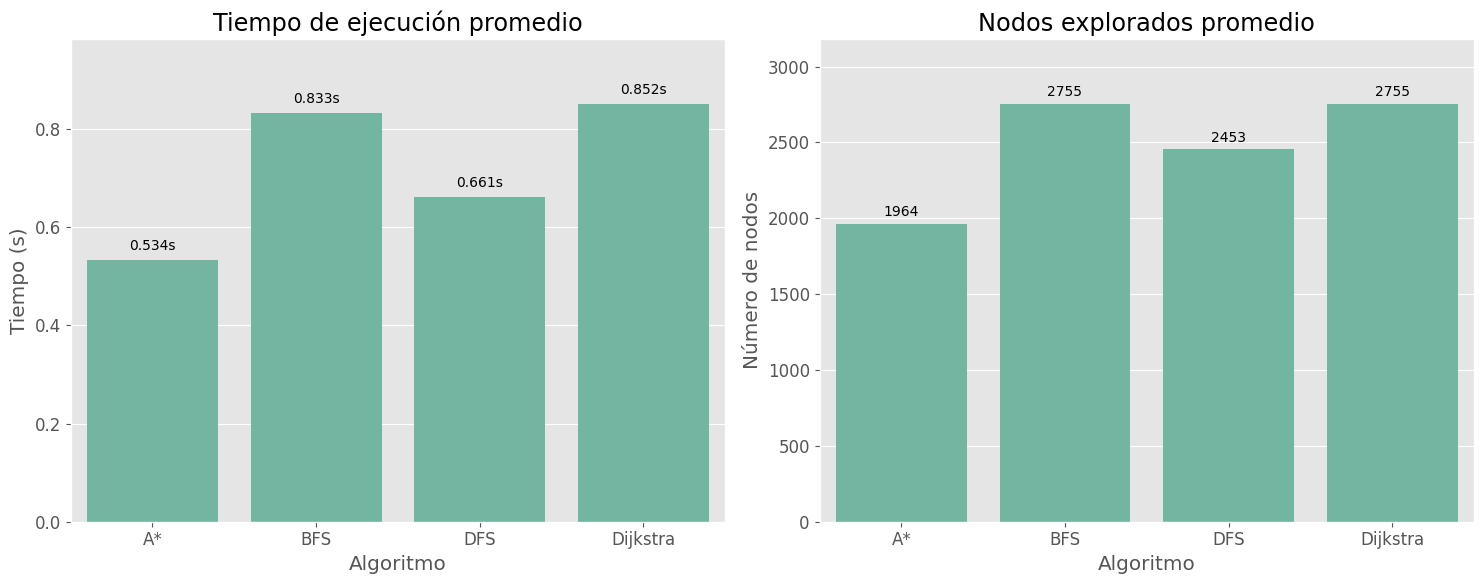

In [8]:
# %% Visualización 1: Tiempo de ejecución y nodos explorados promedio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Tiempo de ejecución promedio
bars1 = sns.barplot(x=stats_algoritmos.index, y='tiempo_promedio', data=stats_algoritmos, ax=ax1)
ax1.set_title('Tiempo de ejecución promedio')
ax1.set_ylabel('Tiempo (s)')
ax1.set_xlabel('Algoritmo')

# Añadir los valores sobre cada barra
for i, bar in enumerate(bars1.patches):
    valor = stats_algoritmos['tiempo_promedio'].iloc[i]
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.02,
        f'{valor:.3f}s',
        ha='center',
        fontsize=10,
    )

# Nodos explorados promedio
bars2 = sns.barplot(x=stats_algoritmos.index, y='nodos_promedio', data=stats_algoritmos, ax=ax2)
ax2.set_title('Nodos explorados promedio')
ax2.set_ylabel('Número de nodos')
ax2.set_xlabel('Algoritmo')

# Añadir los valores sobre cada barra
for i, bar in enumerate(bars2.patches):
    valor = stats_algoritmos['nodos_promedio'].iloc[i]
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 50,  # Ajustado para que quede por encima
        f'{valor:.0f}',  # Sin decimales para los nodos
        ha='center',
        fontsize=10,
    )

# Ajustar el límite superior del eje y para dejar espacio para los valores
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.1)  # 10% más de espacio
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.1)

plt.tight_layout()
plt.show()

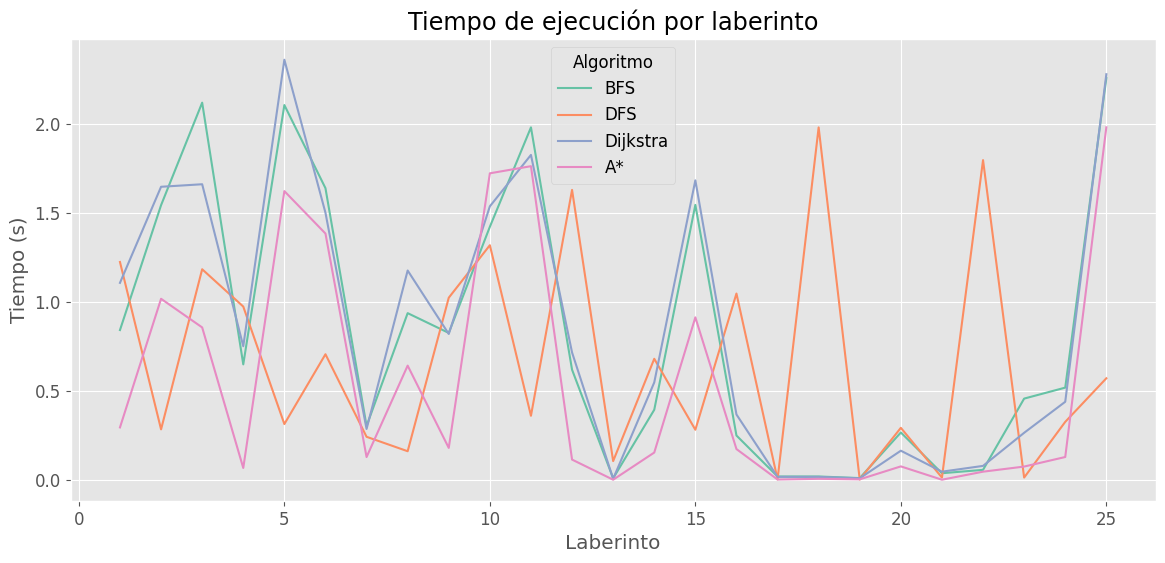

In [9]:
# %% Visualización 2: Tiempo de ejecución por laberinto
plt.figure(figsize=(14, 6))

# Seleccionar los primeros 10 laberintos para mejor visualización
laberintos_muestra = sorted(datos['laberinto'].unique())[:30]
datos_muestra = datos[datos['laberinto'].isin(laberintos_muestra)]

# Gráfico de líneas
sns.lineplot(x='laberinto', y='tiempo_ejecucion', hue='algoritmo', data=datos_muestra)
plt.title('Tiempo de ejecución por laberinto')
plt.ylabel('Tiempo (s)')
plt.xlabel('Laberinto')
plt.legend(title='Algoritmo')
plt.grid(True)
plt.show()

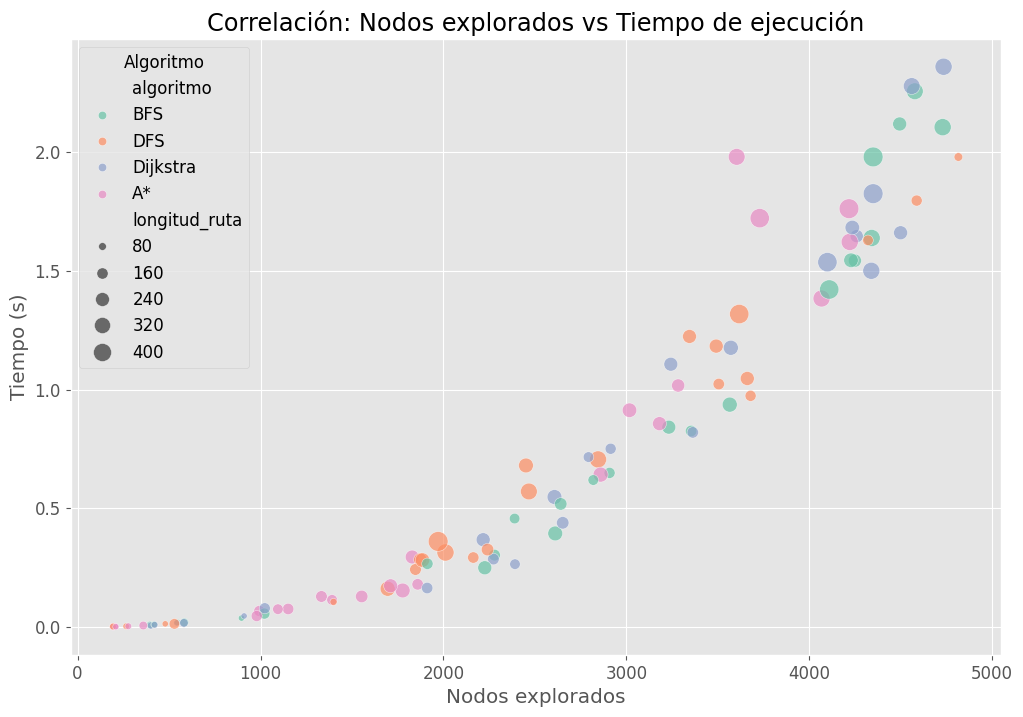

In [10]:
# %% Visualización 3: Correlación entre nodos explorados y tiempo
plt.figure(figsize=(12, 8))

# Gráfico de dispersión
sns.scatterplot(x='nodos_explorados', y='tiempo_ejecucion', hue='algoritmo', 
                size='longitud_ruta', sizes=(20, 200), data=datos, alpha=0.7)
plt.title('Correlación: Nodos explorados vs Tiempo de ejecución')
plt.ylabel('Tiempo (s)')
plt.xlabel('Nodos explorados')
plt.legend(title='Algoritmo')
plt.grid(True)
plt.show()


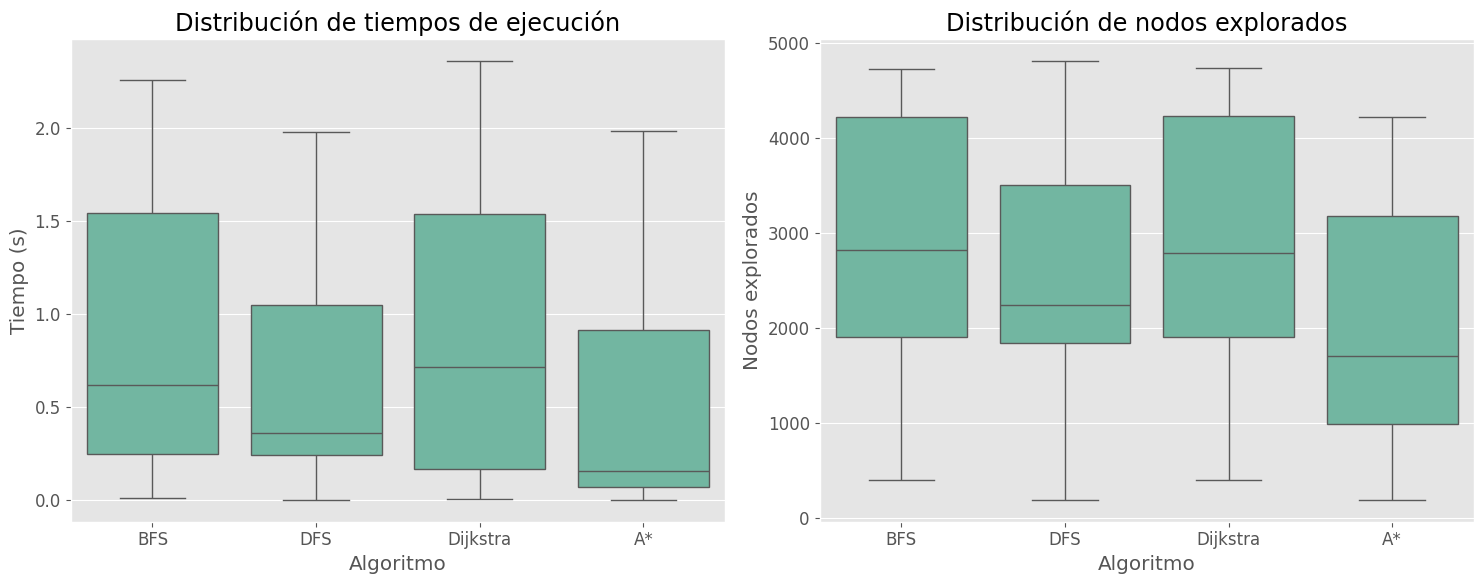

In [11]:
# %% Visualización 4: Distribución de tiempos y nodos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot de tiempos
sns.boxplot(x='algoritmo', y='tiempo_ejecucion', data=datos, ax=ax1)
ax1.set_title('Distribución de tiempos de ejecución')
ax1.set_ylabel('Tiempo (s)')
ax1.set_xlabel('Algoritmo')

# Boxplot de nodos
sns.boxplot(x='algoritmo', y='nodos_explorados', data=datos, ax=ax2)
ax2.set_title('Distribución de nodos explorados')
ax2.set_ylabel('Nodos explorados')
ax2.set_xlabel('Algoritmo')

plt.tight_layout()
plt.show()

In [12]:
# %% Conclusiones
print("Conclusiones del análisis:")
print(f"1. El algoritmo más eficiente en tiempo es {algoritmo_mas_rapido} con un tiempo promedio de {stats_algoritmos.loc[algoritmo_mas_rapido, 'tiempo_promedio']}s.")
print(f"2. El algoritmo que explora menos nodos es {algoritmo_mas_eficiente} con un promedio de {stats_algoritmos.loc[algoritmo_mas_eficiente, 'nodos_promedio']} nodos.")

# Verificar si los algoritmos encuentran rutas de la misma longitud
misma_longitud = stats_algoritmos['longitud_promedio'].nunique() == 1
if misma_longitud:
    print(f"3. Todos los algoritmos encuentran rutas de la misma longitud (óptima) con un promedio de {stats_algoritmos['longitud_promedio'].iloc[0]}.")
else:
    print("3. Los algoritmos encuentran rutas de diferentes longitudes:")
    for algoritmo in stats_algoritmos.index:
        print(f"   - {algoritmo}: {stats_algoritmos.loc[algoritmo, 'longitud_promedio']}")

Conclusiones del análisis:
1. El algoritmo más eficiente en tiempo es A* con un tiempo promedio de 0.5344s.
2. El algoritmo que explora menos nodos es A* con un promedio de 1963.72 nodos.
3. Todos los algoritmos encuentran rutas de la misma longitud (óptima) con un promedio de 215.08.


In [13]:
# %% Visualización 6: Tablas de clasificación en formato texto
import pandas as pd
import numpy as np

# Función para clasificar algoritmos en cada laberinto
def crear_tabla_clasificacion():
    # Lista para almacenar los dataframes de clasificación de cada laberinto
    tablas_clasificacion = []
    
    # Para cada laberinto, creamos una tabla de clasificación
    for lab in sorted(datos['laberinto'].unique()):
        # Filtrar datos para el laberinto actual
        datos_lab = datos[datos['laberinto'] == lab]
        
        # Crear un DataFrame para este laberinto
        tabla = pd.DataFrame(index=algoritmos)
        
        # Clasificar por tiempo (menor es mejor)
        tiempos = datos_lab.set_index('algoritmo')['tiempo_ejecucion']
        tabla['Tiempo'] = tiempos.rank().astype(int)
        tabla['Tiempo_valor'] = tiempos.values
        
        # Clasificar por nodos (menor es mejor)
        nodos = datos_lab.set_index('algoritmo')['nodos_explorados']
        tabla['Nodos'] = nodos.rank().astype(int)
        tabla['Nodos_valor'] = nodos.values
        
        # Clasificar por longitud (menor es mejor)
        longitud = datos_lab.set_index('algoritmo')['longitud_ruta']
        tabla['Longitud'] = longitud.rank().astype(int)
        tabla['Longitud_valor'] = longitud.values
        
        # Puntuación total (suma de rankings, menor es mejor)
        tabla['Total'] = tabla['Tiempo'] + tabla['Nodos'] + tabla['Longitud']
        
        # Ranking total
        tabla['Ranking'] = tabla['Total'].rank().astype(int)
        
        # Añadir el laberinto como información
        tabla['Laberinto'] = lab
        
        tablas_clasificacion.append(tabla)
    
    return tablas_clasificacion

# Crear las tablas
tablas = crear_tabla_clasificacion()

# %% Función para formatear tabla en texto
def formatear_tabla_texto(tabla, titulo):
    # Preparar los datos para la tabla
    datos_tabla = tabla[['Ranking', 'Tiempo', 'Tiempo_valor', 'Nodos', 'Nodos_valor', 'Longitud', 'Longitud_valor']]
    
    # Formatear los valores numéricos
    datos_tabla['Tiempo_valor'] = datos_tabla['Tiempo_valor'].round(4)
    datos_tabla['Nodos_valor'] = datos_tabla['Nodos_valor'].astype(int)
    datos_tabla['Longitud_valor'] = datos_tabla['Longitud_valor'].astype(int)
    
    # Renombrar columnas
    datos_tabla.columns = ['Rank', 'R-T', 'Tiempo (s)', 'R-N', 'Nodos', 'R-L', 'Long.']
    
    # Crear la tabla en formato texto
    tabla_str = f"\n{'-'*80}\n"
    tabla_str += f"{titulo.center(80)}\n"
    tabla_str += f"{'-'*80}\n\n"
    
    # Encabezados
    headers = ['Algoritmo'] + list(datos_tabla.columns)
    tabla_str += f"{headers[0]:<10} | {headers[1]:<4} | {headers[2]:<4} | {headers[3]:<9} | {headers[4]:<4} | {headers[5]:<5} | {headers[6]:<4} | {headers[7]:<5}\n"
    tabla_str += f"{'-'*10}-|-{'-'*4}-|-{'-'*4}-|-{'-'*9}-|-{'-'*4}-|-{'-'*5}-|-{'-'*4}-|-{'-'*5}\n"
    
    # Filas de datos
    for algoritmo in datos_tabla.index:
        fila = datos_tabla.loc[algoritmo]
        
        # Añadir indicadores visuales para los rankings
        rank_symbols = {1: '🥇', 2: '🥈', 3: '🥉', 4: '  '}
        ranking_symbol = rank_symbols.get(fila['Rank'], '  ')
        
        tiempo_symbol = rank_symbols.get(fila['R-T'], '  ')
        nodos_symbol = rank_symbols.get(fila['R-N'], '  ')
        long_symbol = rank_symbols.get(fila['R-L'], '  ')
        
        tabla_str += f"{algoritmo:<10} | {fila['Rank']:<2}{ranking_symbol} | {fila['R-T']:<2}{tiempo_symbol} | {fila['Tiempo (s)']:<9.4f} | {fila['R-N']:<2}{nodos_symbol} | {fila['Nodos']:<5} | {fila['R-L']:<2}{long_symbol} | {fila['Long.']:<5}\n"
    
    tabla_str += f"\n"
    return tabla_str

# %% Mostrar las tablas en formato texto (agrupadas de 3 en 3)
total_tablas = len(tablas)
tablas_por_grupo = 3

# Crear la salida con todas las tablas
output = ""

for i in range(0, total_tablas, tablas_por_grupo):
    # Tomar hasta 3 tablas para este grupo
    grupo_tablas = tablas[i:min(i+tablas_por_grupo, total_tablas)]
    
    # Formatear cada tabla en el grupo
    tablas_texto = [formatear_tabla_texto(tabla, f"Laberinto {tabla['Laberinto'].iloc[0]}") 
                    for tabla in grupo_tablas]
    
    # Juntar las tablas del grupo y añadirlas a la salida
    output += "".join(tablas_texto)
    
    # Separador entre grupos
    if i + tablas_por_grupo < total_tablas:
        output += f"\n{'='*80}\n\n"

# Mostrar las tablas en grupos de 3
print(output)

# %% Opcionalmente, guardar las tablas en un archivo
with open('clasificacion_algoritmos.txt', 'w', encoding='utf-8') as file:
    file.write(output)
    
# Informar al usuario
print(f"\nLas tablas se han guardado en 'clasificacion_algoritmos.txt'")

# %% Crear y mostrar tabla resumen en formato texto
# Contar cuántas veces cada algoritmo obtuvo cada ranking
resumen = pd.DataFrame(index=algoritmos, columns=[1, 2, 3, 4])

for algoritmo in algoritmos:
    for ranking in range(1, 5):
        # Contar cuántas veces este algoritmo obtuvo este ranking
        resumen.loc[algoritmo, ranking] = sum(1 for tabla in tablas 
                                              if tabla.loc[algoritmo, 'Ranking'] == ranking)

# Añadir columnas adicionales
resumen['Puntuación'] = resumen[1]*1 + resumen[2]*2 + resumen[3]*3 + resumen[4]*4
resumen['Ranking Promedio'] = resumen['Puntuación'] / len(tablas)

# Ordenar por puntuación
resumen = resumen.sort_values('Puntuación')

# Formatear tabla resumen
resumen_texto = f"\n{'-'*80}\n"
resumen_texto += f"{'RESUMEN DE CLASIFICACIÓN DE ALGORITMOS'.center(80)}\n"
resumen_texto += f"{'-'*80}\n\n"

# Renombrar columnas para mejor comprensión
resumen.columns = ['1° Lugar', '2° Lugar', '3° Lugar', '4° Lugar', 'Puntuación', 'Ranking Promedio']

# Formatear encabezados
headers = ['Algoritmo'] + list(resumen.columns)
resumen_texto += f"{headers[0]:<10} | {headers[1]:^8} | {headers[2]:^8} | {headers[3]:^8} | {headers[4]:^8} | {headers[5]:^12} | {headers[6]:^15}\n"
resumen_texto += f"{'-'*10}-|-{'-'*8}-|-{'-'*8}-|-{'-'*8}-|-{'-'*8}-|-{'-'*12}-|-{'-'*15}\n"

# Formatear filas
for algoritmo in resumen.index:
    fila = resumen.loc[algoritmo]
    
    # Añadir indicadores visuales para el mejor algoritmo
    es_mejor = algoritmo == resumen.index[0]
    mejor_marca = '★ ' if es_mejor else '  '
    
    resumen_texto += f"{mejor_marca}{algoritmo:<8} | {fila['1° Lugar']:^8} | {fila['2° Lugar']:^8} | {fila['3° Lugar']:^8} | {fila['4° Lugar']:^8} | {fila['Puntuación']:^12.1f} | {fila['Ranking Promedio']:^15.2f}\n"

print(resumen_texto)

# También guardar el resumen en el archivo
with open('clasificacion_algoritmos.txt', 'a', encoding='utf-8') as file:
    file.write("\n\n")
    file.write(resumen_texto)

print(f"El resumen también se ha añadido a 'clasificacion_algoritmos.txt'")

# %% Conclusiones en texto
conclusiones = f"\n{'-'*80}\n"
conclusiones += f"{'CONCLUSIONES DEL ANÁLISIS'.center(80)}\n"
conclusiones += f"{'-'*80}\n\n"

# Determinar el mejor algoritmo basado en el resumen
mejor_algoritmo = resumen.index[0]
segundo_algoritmo = resumen.index[1]

# Estadísticas del mejor algoritmo
mejor_stats = stats_algoritmos.loc[mejor_algoritmo]

conclusiones += f"1. El algoritmo {mejor_algoritmo} es el más eficiente en general, obteniendo el primer lugar\n"
conclusiones += f"   en {resumen.loc[mejor_algoritmo, '1° Lugar']} de los 25 laberintos.\n\n"

conclusiones += f"2. {mejor_algoritmo} presenta el mejor rendimiento con:\n"
conclusiones += f"   - Tiempo promedio: {mejor_stats['tiempo_promedio']:.4f}s\n"
conclusiones += f"   - Nodos explorados: {mejor_stats['nodos_promedio']:.0f}\n\n"

conclusiones += f"3. {segundo_algoritmo} es el segundo mejor algoritmo, con un ranking promedio\n"
conclusiones += f"   de {resumen.loc[segundo_algoritmo, 'Ranking Promedio']:.2f}.\n\n"

# Verificar si todos los algoritmos encuentran la misma longitud
longitudes_iguales = stats_algoritmos['longitud_promedio'].nunique() == 1
if longitudes_iguales:
    conclusiones += f"4. Todos los algoritmos encuentran rutas de la misma longitud óptima en cada laberinto,\n"
    conclusiones += f"   con una longitud promedio de {stats_algoritmos['longitud_promedio'].iloc[0]:.1f}.\n\n"
else:
    conclusiones += f"4. Se observan diferencias en las longitudes de ruta encontradas por los algoritmos.\n\n"

# Comentario sobre la correlación entre tiempo y nodos
conclusiones += f"5. Existe una correlación directa entre el número de nodos explorados y el tiempo\n"
conclusiones += f"   de ejecución, siendo {mejor_algoritmo} el que logra minimizar ambos factores.\n"

print(conclusiones)

# También añadir las conclusiones al archivo
with open('clasificacion_algoritmos.txt', 'a', encoding='utf-8') as file:
    file.write("\n\n")
    file.write(conclusiones)

print(f"Las conclusiones también se han añadido a 'clasificacion_algoritmos.txt'")


--------------------------------------------------------------------------------
                                  Laberinto 1                                   
--------------------------------------------------------------------------------

Algoritmo  | Rank | R-T  | Tiempo (s) | R-N  | Nodos | R-L  | Long.
-----------|------|------|-----------|------|-------|------|------
BFS        | 2.0🥈 | 2.0🥈 | 0.8418    | 2.0🥈 | 3232.0 | 2.0🥈 | 239.0
DFS        | 4.0   | 4.0   | 1.2236    | 4.0   | 3345.0 | 2.0🥈 | 239.0
Dijkstra   | 3.0🥉 | 3.0🥉 | 1.1067    | 3.0🥉 | 3243.0 | 2.0🥈 | 239.0
A*         | 1.0🥇 | 1.0🥇 | 0.2954    | 1.0🥇 | 1829.0 | 2.0🥈 | 239.0


--------------------------------------------------------------------------------
                                  Laberinto 2                                   
--------------------------------------------------------------------------------

Algoritmo  | Rank | R-T  | Tiempo (s) | R-N  | Nodos | R-L  | Long.
-----------|------|------|-----

C:\Users\villa\AppData\Local\Temp\ipykernel_13856\2472213766.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_tabla['Tiempo_valor'] = datos_tabla['Tiempo_valor'].round(4)
C:\Users\villa\AppData\Local\Temp\ipykernel_13856\2472213766.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_tabla['Nodos_valor'] = datos_tabla['Nodos_valor'].astype(int)
C:\Users\villa\AppData\Local\Temp\ipykernel_13856\2472213766.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 